pandas Series

In [1]:
import pandas as pd

In [3]:
a = pd.Series([82,75,73,89,79])

In [4]:
a.describe()

count     5.000000
mean     79.600000
std       6.308724
min      73.000000
25%      75.000000
50%      79.000000
75%      82.000000
max      89.000000
dtype: float64

In [5]:
print(a[3])

89


In [6]:
for i in a:
    print(i)

82
75
73
89
79


In [7]:
print(a-5)

0    77
1    70
2    68
3    84
4    74
dtype: int64


In [8]:
print(a>80)

0     True
1    False
2    False
3     True
4    False
dtype: bool


In [9]:
print(a.mean())

79.6


In [10]:
# 计算同向和反向特征的元素个数

def dir_judge(var1, var2):
    mean1 = var1.mean()
    mean2 = var2.mean()
    
    same_dir = ((var1 > mean1)&(var2 > mean2)) | ((var1 < mean1)&(var2 < mean2))
    print(same_dir)
    return(len(same_dir[same_dir == True]),len(same_dir[same_dir == False]))



In [11]:
math_score = pd.Series([143,137,141,130,136,128,139])
eng_score = pd.Series([73,82,75,76,65,89,67])

dir_judge(math_score,eng_score)

0    False
1     True
2    False
3    False
4     True
5    False
6    False
dtype: bool


(2, 5)

索引

series为列表和字典的结合

In [12]:
math_score = pd.Series([143,137,141,130,136,128,139],
                index = ['ZQ','ZZX','YSC','WDF','SZY','XJL','XJY'])
math_score

ZQ     143
ZZX    137
YSC    141
WDF    130
SZY    136
XJL    128
XJY    139
dtype: int64

In [13]:
math_score.describe()

count      7.000000
mean     136.285714
std        5.529144
min      128.000000
25%      133.000000
50%      137.000000
75%      140.000000
max      143.000000
dtype: float64

In [14]:
math_score.loc['ZZX']  #索引

137

In [15]:
math_score.iloc[2]   #位置

141

In [16]:
math_score[2]

141

In [17]:
math_score.idxmax()

'ZQ'

向量计算

In [18]:
math_score = pd.Series([143,137,141,130,136,128,139],
                index = ['ZQ','ZZX','YSC','WDF','SZY','XJL','XJY'])
eng_score = pd.Series([73,82,75,76,65,89,67],
                     index = ['ZQ','ZZX','YSC','WDF','SZY','XJL','XJY'])

In [19]:
math_score + eng_score

ZQ     216
ZZX    219
YSC    216
WDF    206
SZY    201
XJL    217
XJY    206
dtype: int64

In [20]:
pol_score = pd.Series([73,71,65,70,67,68,60],
                     index = ['ZZX','YSC','ZQ','WDF','XJY','XJL','SZY'])

In [21]:
pol_score + math_score + eng_score  # 根据索引相加

SZY    261
WDF    276
XJL    285
XJY    273
YSC    287
ZQ     281
ZZX    292
dtype: int64

In [22]:
pro_score = pd.Series([150,100,140,130,120,110,119],
                     index =  ['ZQ','MD','AD','CD','ZZ','RNG','XJY'])

In [23]:
pro_score + pol_score

AD       NaN
CD       NaN
MD       NaN
RNG      NaN
SZY      NaN
WDF      NaN
XJL      NaN
XJY    186.0
YSC      NaN
ZQ     215.0
ZZ       NaN
ZZX      NaN
dtype: float64

apply

In [24]:
pol_score = pd.Series([73,71,65,70,67,68,60])

In [25]:
def multi(num):
    return num * 2

In [26]:
pol_score.apply(multi)

0    146
1    142
2    130
3    140
4    134
5    136
6    120
dtype: int64

In [27]:
pol_score * 2

0    146
1    142
2    130
3    140
4    134
5    136
6    120
dtype: int64

In [28]:
def multi_big(num):
    if num > 70:
        return num * 2

In [29]:
pol_score.apply(multi_big)

0    146.0
1    142.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
dtype: float64

# 缺失值填充

去除NAN:Not a Number


In [32]:
pro_score = pd.Series([150,100,140,130,120,110,119],
                     index =  ['ZQ','MD','AD','CD','ZZ','RNG','XJY'])
pol_score = pd.Series([73,71,65,70,67,68,60],
                     index = ['ZZX','YSC','ZQ','WDF','XJY','XJL','SZY'])

In [33]:
pro_score + pol_score

AD       NaN
CD       NaN
MD       NaN
RNG      NaN
SZY      NaN
WDF      NaN
XJL      NaN
XJY    186.0
YSC      NaN
ZQ     215.0
ZZ       NaN
ZZX      NaN
dtype: float64

dropna

In [34]:
(pro_score + pol_score).dropna()  
# 直接去除NAN值

XJY    186.0
ZQ     215.0
dtype: float64

fillna

In [36]:
(pro_score + pol_score).fillna(0)  
# 将NAN值填充为一个常数

AD       0.0
CD       0.0
MD       0.0
RNG      0.0
SZY      0.0
WDF      0.0
XJL      0.0
XJY    186.0
YSC      0.0
ZQ     215.0
ZZ       0.0
ZZX      0.0
dtype: float64

add

In [38]:
pro_score.add(pol_score, fill_value= 0) 
# 以pro_score为基础加上pol_score，无对应项相当于加0

AD     140.0
CD     130.0
MD     100.0
RNG    110.0
SZY     60.0
WDF     70.0
XJL     68.0
XJY    186.0
YSC     71.0
ZQ     215.0
ZZ     120.0
ZZX     73.0
dtype: float64

# 绘图

In [49]:
# pol_score = pd.Series([73,71,65,70,67,68,60],
#                      index = ['ZZX','YSC','ZQ','WDF','XJY','XJL','SZY'],
#                      name = 'politics scores in GRE')
import numpy as np
pol_score = pd.Series(np.random.randn(100)+65,name = 'politics scores in GRE')

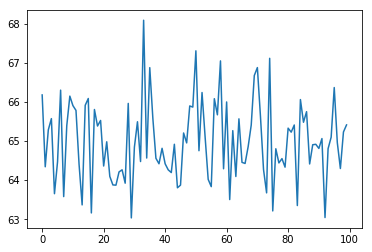

In [50]:
pol_score.plot(kind = 'line')
# kind = 'bar','hist','box'

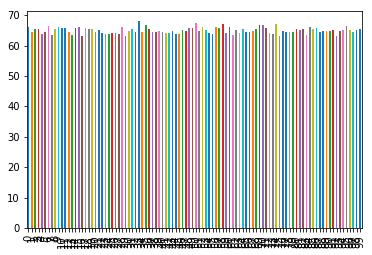

In [51]:
pol_score.plot.bar()

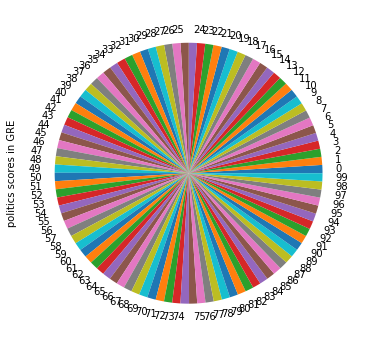

In [57]:
pol_score.plot.pie(figsize = (6,6))

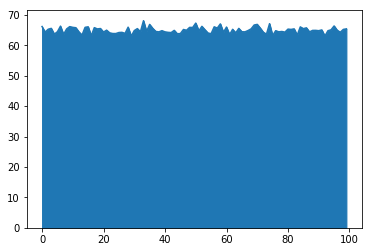

In [53]:
pol_score.plot.area()

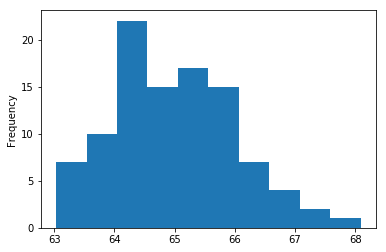

In [54]:
pol_score.plot.hist()

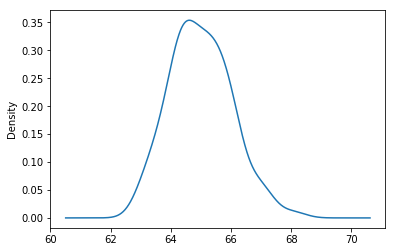

In [55]:
pol_score.plot.kde()
# 密度图

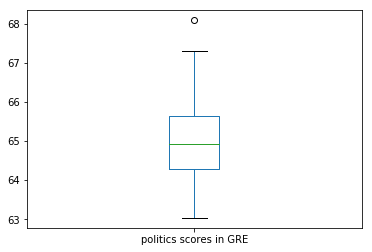

In [56]:
pol_score.plot.box()

# DataFrame

In [10]:
import numpy as np
gre_scores_np = np.array([
    ['name','pol','eng','math','stat'],
    ['zzx',73,82,137,114,],
    ['zq',65,73,143,150,],
    ['ysc',71,75,141,94,],
    ['xjy',67,67,139,119,],
    ['xjl',68,89,128,115,],
])

In [11]:
gre_scores_np.dtype
# 全转为字符串

dtype('<U4')

###  使用dataframe

In [6]:
import pandas as pd

gre_scores = pd.DataFrame({
    'name':['zzx','zq','ysc','xjy','xjl'],
    'pol':[73,65,71,67,68],
    'eng':[82,73,75,67,89],
    'math':[137,143,141,139,128],
    'stat':[114,150,94,119,115]
})

gre_scores


,name,pol,eng,math,stat
0,zzx,73,82,137,114
1,zq,65,73,143,150
2,ysc,71,75,141,94
3,xjy,67,67,139,119
4,xjl,68,89,128,115


In [7]:
gre_scores.mean()
# 按列求均值，识别数字型数据

pol      68.8
eng      77.2
math    137.6
stat    118.4
dtype: float64

In [8]:
gre_scores.sum(axis=1)

0    406
1    431
2    381
3    392
4    400
dtype: int64

In [9]:
gre_scores.max()

name    zzx
pol      73
eng      89
math    143
stat    150
dtype: object

### np,pd求std 

In [12]:
gre_scores.std()

pol      3.193744
eng      8.497058
math     5.813777
stat    20.156885
dtype: float64

In [14]:
gre_scores_np = np.array([
    [73,82,137,114,],
    [65,73,143,150,],
    [71,75,141,94,],
    [67,67,139,119,],
    [68,89,128,115,],
])
gre_scores_np.std(axis=0)

array([ 2.85657137,  7.6       ,  5.2       , 18.02886574])

np求std的值比pd小

In [17]:
a = np.array([range(10)])
print(a)
print(a.std())

[[0 1 2 3 4 5 6 7 8 9]]
2.8722813232690143


In [19]:
np.sqrt(((a-np.mean(a))**2).sum() / (a.size - 1)) #校正除以n-1

3.0276503540974917

In [20]:
np.sqrt(((a-np.mean(a))**2).sum() / (a.size))

2.8722813232690143

In [25]:
b = pd.DataFrame([0,1,2,3,4,5,6,7,8,9])
print(b)

   0
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9


In [26]:
b.std()
# pandas 默认作贝塞尔校正即计算样本标准差

0    3.02765
dtype: float64

In [27]:
b.std(ddof = 0) # 计算总体标准差

0    2.872281
dtype: float64

## 读取df元素 

In [28]:
print(gre_scores)

  name  pol  eng  math  stat
0  zzx   73   82   137   114
1   zq   65   73   143   150
2  ysc   71   75   141    94
3  xjy   67   67   139   119
4  xjl   68   89   128   115


In [29]:
import pandas as pd

gre_scores = pd.DataFrame({
    
    'pol':[73,65,71,67,68],
    'eng':[82,73,75,67,89],
    'math':[137,143,141,139,128],
    'stat':[114,150,94,119,115]
},index = ['zzx','zq','ysc','xjy','xjl'],)

gre_scores


,pol,eng,math,stat
zzx,73,82,137,114
zq,65,73,143,150
ysc,71,75,141,94
xjy,67,67,139,119
xjl,68,89,128,115


In [30]:
gre_scores.loc['zzx']
# 通过自设标签

pol      73
eng      82
math    137
stat    114
Name: zzx, dtype: int64

In [31]:
gre_scores.iloc[0]
# 通过索引

pol      73
eng      82
math    137
stat    114
Name: zzx, dtype: int64

In [32]:
gre_scores['stat']

zzx    114
zq     150
ysc     94
xjy    119
xjl    115
Name: stat, dtype: int64

In [33]:
type(gre_scores.loc['zzx'])
# Series

pandas.core.series.Series

In [35]:
gre_scores['stat'].idxmax()

'zq'

In [37]:
gre_scores.loc[gre_scores['stat'].idxmax()]

pol      65
eng      73
math    143
stat    150
Name: zq, dtype: int64

In [39]:
gre_scores.loc[gre_scores['stat'].idxmax()].sum()
# 找出专业课最高的同学的总成绩

431